In [120]:
# Importando as bibliotecas necessárias

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Importando a base de dados

In [121]:
df = pd.read_csv("data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [122]:
df.rename(columns={"age": "idade",
                   "sex": "sexo",
                   "bmi": "IMC",
                   "children": "qt_filhos",
                   "smoker": "fumante",
                   "region": "regiao",
                   "expenses": "gastos"}, inplace=True)
df.head()

,idade,sexo,IMC,qt_filhos,fumante,regiao,gastos
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idade      1338 non-null   int64  
 1   sexo       1338 non-null   object 
 2   IMC        1338 non-null   float64
 3   qt_filhos  1338 non-null   int64  
 4   fumante    1338 non-null   object 
 5   regiao     1338 non-null   object 
 6   gastos     1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Temos 1338 entradas e todas as colunas possuem 1338 valores não nulos, o que significa que não há dados nulos no conjunto de dados. 

In [124]:
df.describe()

,idade,IMC,qt_filhos,gastos
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [125]:
df.describe(include=object)

,sexo,fumante,regiao
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [126]:
# Fazer a troca do valor das variáveis.
# Temos features categóricas? se sim, quais?

## Construindo as visualizações

### Histograma

<AxesSubplot:title={'center':'Histograma dos gastos'}, xlabel='gastos', ylabel='Frequência'>

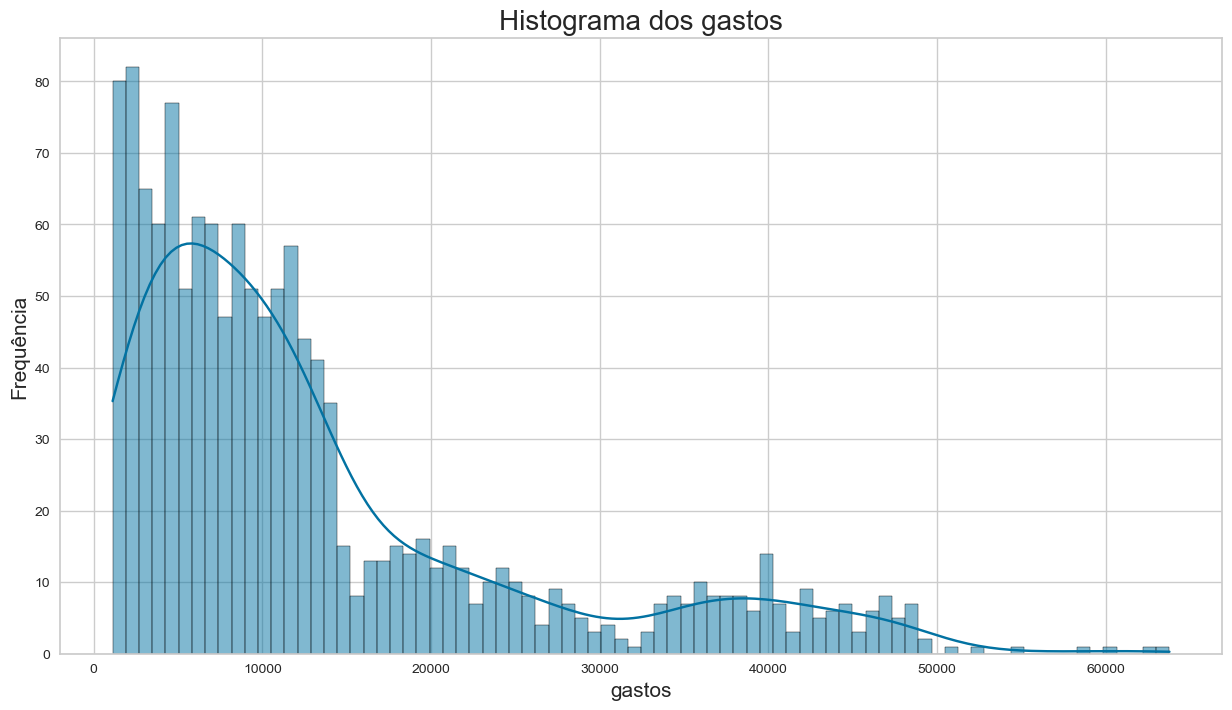

In [127]:
ax = sns.histplot(data=df, x='gastos', bins=80, kde=True)
ax.figure.set_size_inches((15,8))
ax.set_title("Histograma dos gastos", fontsize=20)
ax.set_xlabel("gastos", fontsize=15)
ax.set_ylabel("Frequência", fontsize=15)
ax

![](https://camo.githubusercontent.com/85886e3e09ffa319ea68523b89b1b1a6729f826df6864a5a12a1f1c0edee45c3/68747470733a2f2f692e696d6775722e636f6d2f414464434557782e706e67)

Logo a distribuição da variável target é assimétrica à direita.

**Explicar o que é assimétrica a direita, o isso impacta no conjunto de dados, se temos que consertar isso**

### BoxPlot

In [128]:
# Quais são as variáveis numéricas?

df.select_dtypes(include=['int64', 'float64']).columns

Index(['idade', 'IMC', 'qt_filhos', 'gastos'], dtype='object')

![](https://i.ytimg.com/vi/BE8CVGJuftI/maxresdefault.jpg)

Text(0, 0.5, 'Valor')

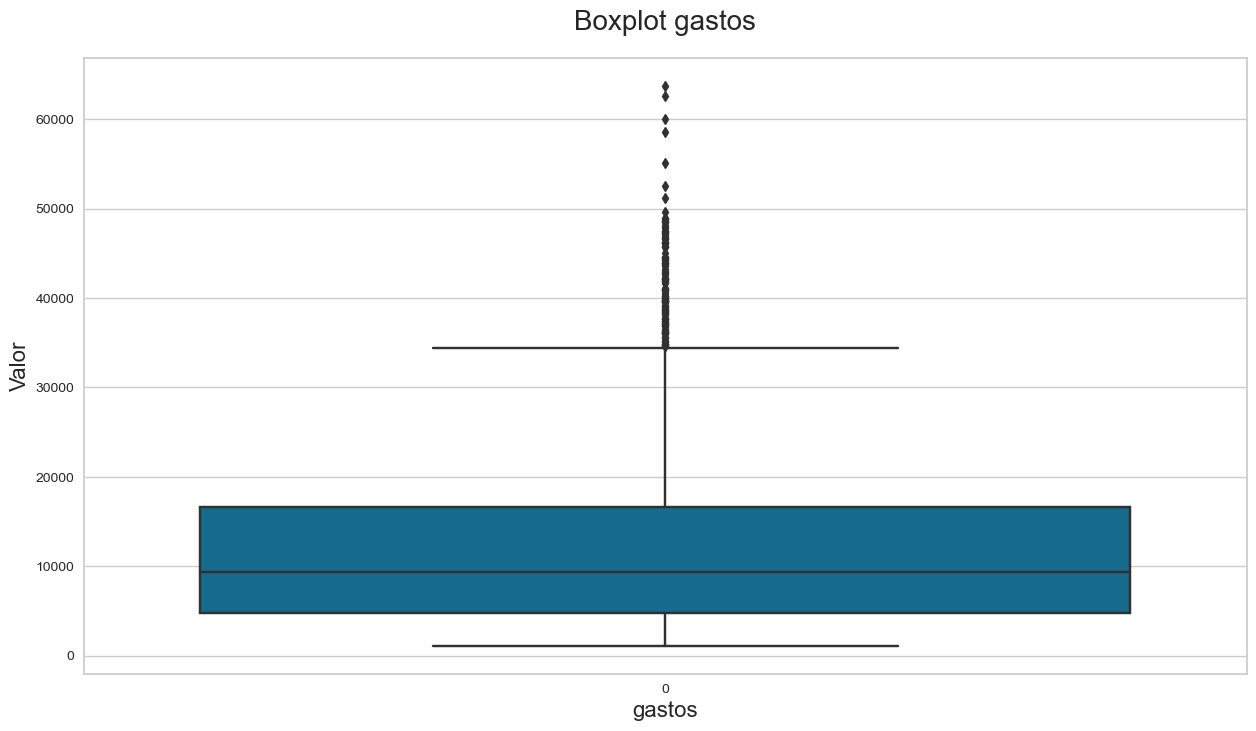

In [129]:
ax = sns.boxplot(data=df['gastos'])
ax.figure.set_size_inches((15,8))
ax.set_title('Boxplot gastos', fontsize=20, pad=20)
ax.set_xlabel("gastos", fontsize=16)
ax.set_ylabel("Valor", fontsize=16)

Percebe-se que a variável target possui alguns possíveis canditados a outliers. **Atenção a isso!**

Vamos analisar a variável target em relação a algumas features e analisar o comportamento.

**1. Idade**

In [130]:
len(df.idade.unique())

47

Text(0, 0.5, 'Gastos')

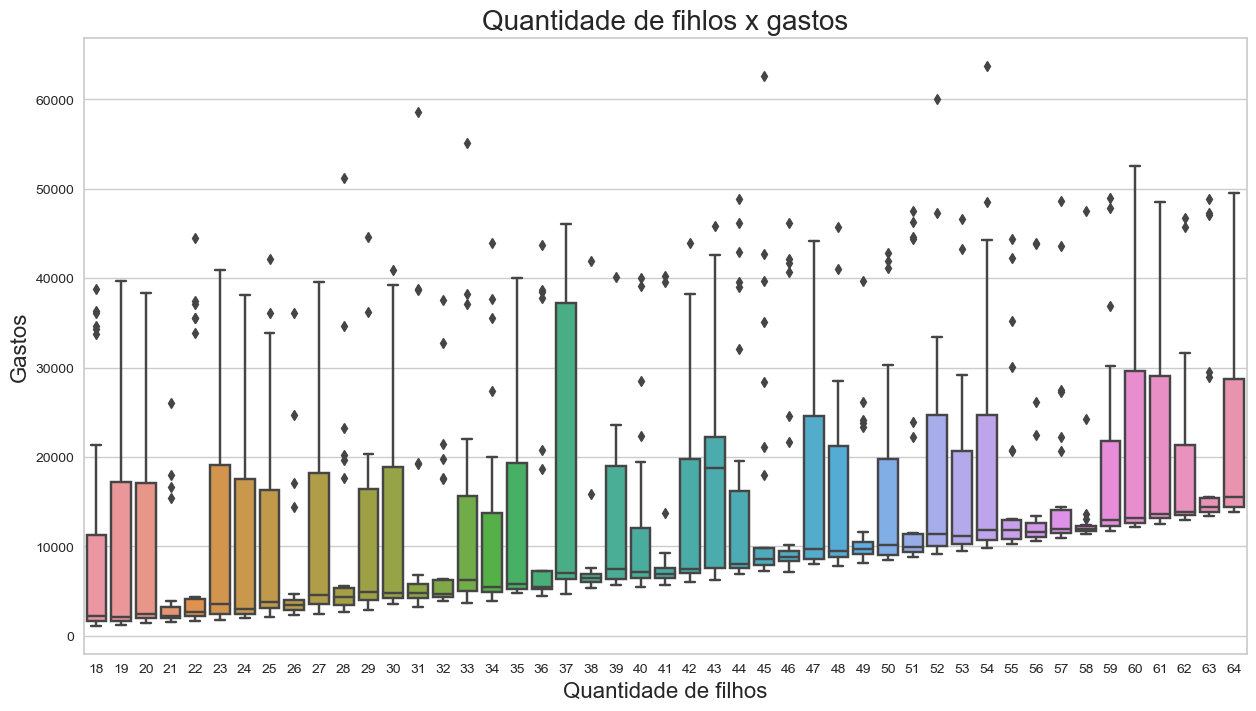

In [131]:
ax = sns.boxplot(x="idade", y="gastos", data=df)
ax.figure.set_size_inches(15,8)
ax.set_title("Quantidade de fihlos x gastos", fontsize=20)
ax.set_xlabel("Quantidade de filhos", fontsize=16)
ax.set_ylabel("Gastos", fontsize=16)


Construir um boxplot pela idade ficaria extremamente poluido, pois há 47 idades diferentes no conjunto de dados.

**2. IMC**

In [132]:
len(df.IMC.unique())

275

Mesma situação citada acima.

**3. qt_filhos**

In [133]:
len(df.qt_filhos.unique())

6

Text(0, 0.5, 'Gastos')

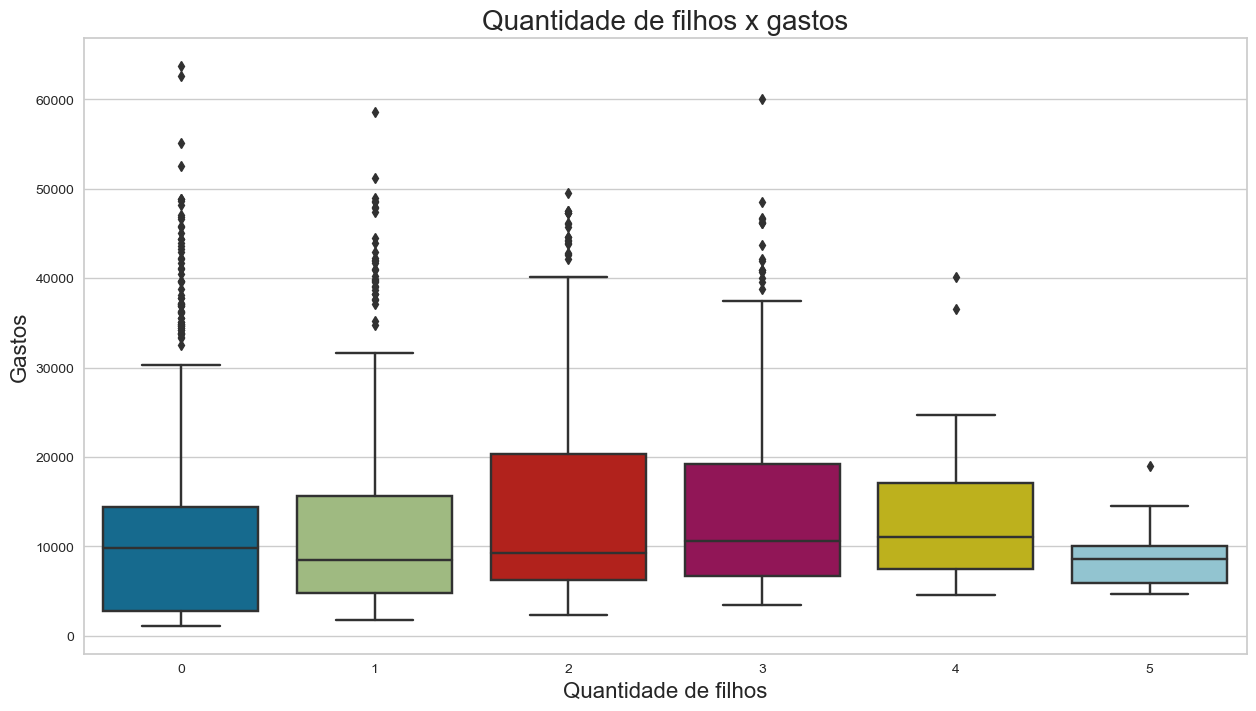

In [134]:
ax = sns.boxplot(x="qt_filhos", y="gastos", data=df)
ax.figure.set_size_inches(15,8)
ax.set_title("Quantidade de filhos x gastos", fontsize=20)
ax.set_xlabel("Quantidade de filhos", fontsize=16)
ax.set_ylabel("Gastos", fontsize=16)


### Countplot

In [135]:
# Quais são as variáveis categóricas?

df.select_dtypes(include=['object']).columns

Index(['sexo', 'fumante', 'regiao'], dtype='object')

In [136]:
def plot_categorical_variable(variable, df):
    ax = sns.countplot(x=variable, data=df)
    ax.figure.set_size_inches(15,8)
    ax.set_title(f"Quantidade de {variable}", fontsize=20)
    ax.set_xlabel(f"{variable}", fontsize=16)
    ax.set_ylabel("Quantidade", fontsize=16)
    
    for container in ax.containers:
        ax.bar_label(container, fontsize=12, padding=2, color='black')

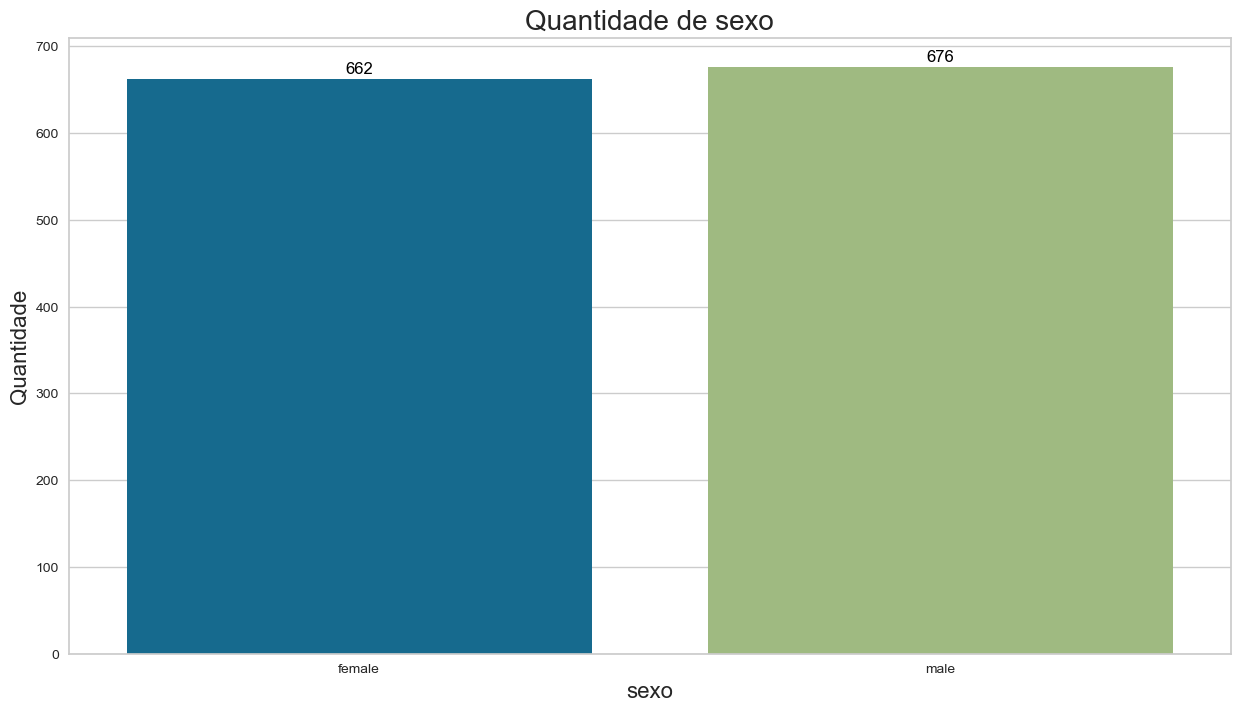

In [137]:
plot_categorical_variable("sexo", df)

Logo o conjunto de dados está balanceado de acordo com o sexo.

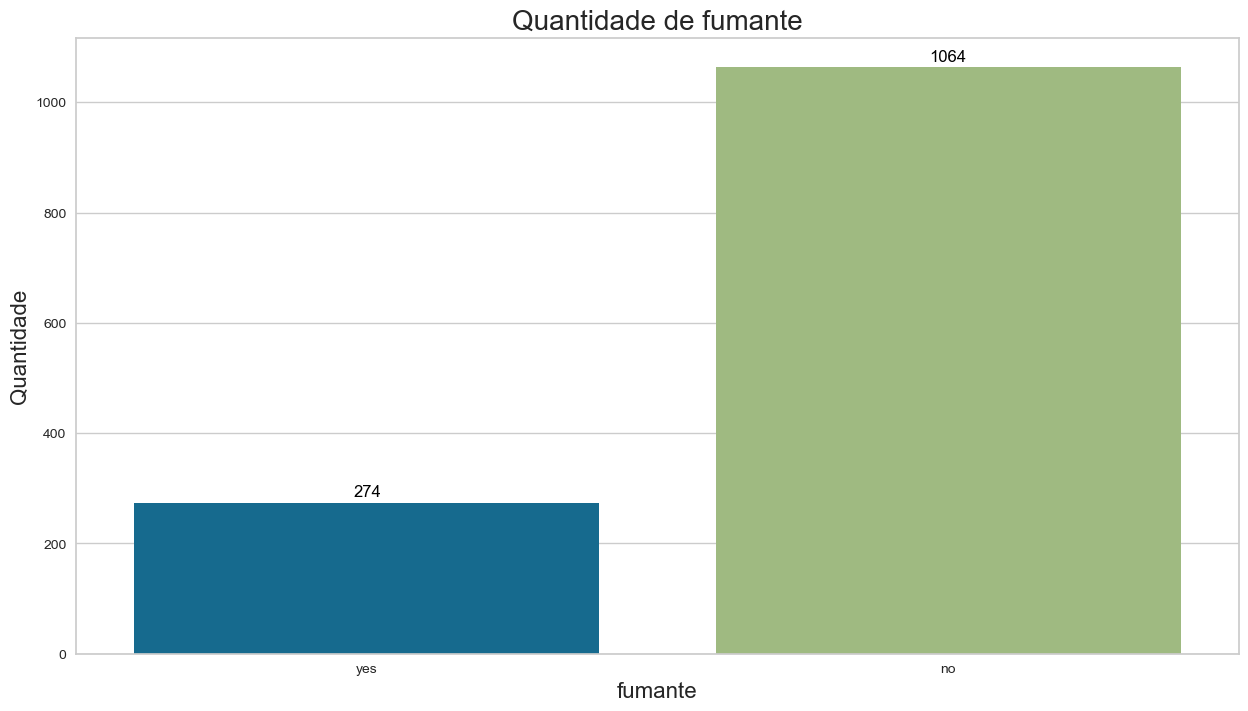

In [138]:
plot_categorical_variable("fumante", df)

Já em relação aos fumantes, o conjunto de dados possui em maior quantidade quem não fuma.

Será se quem é fumante gasta mais que quem não fuma?

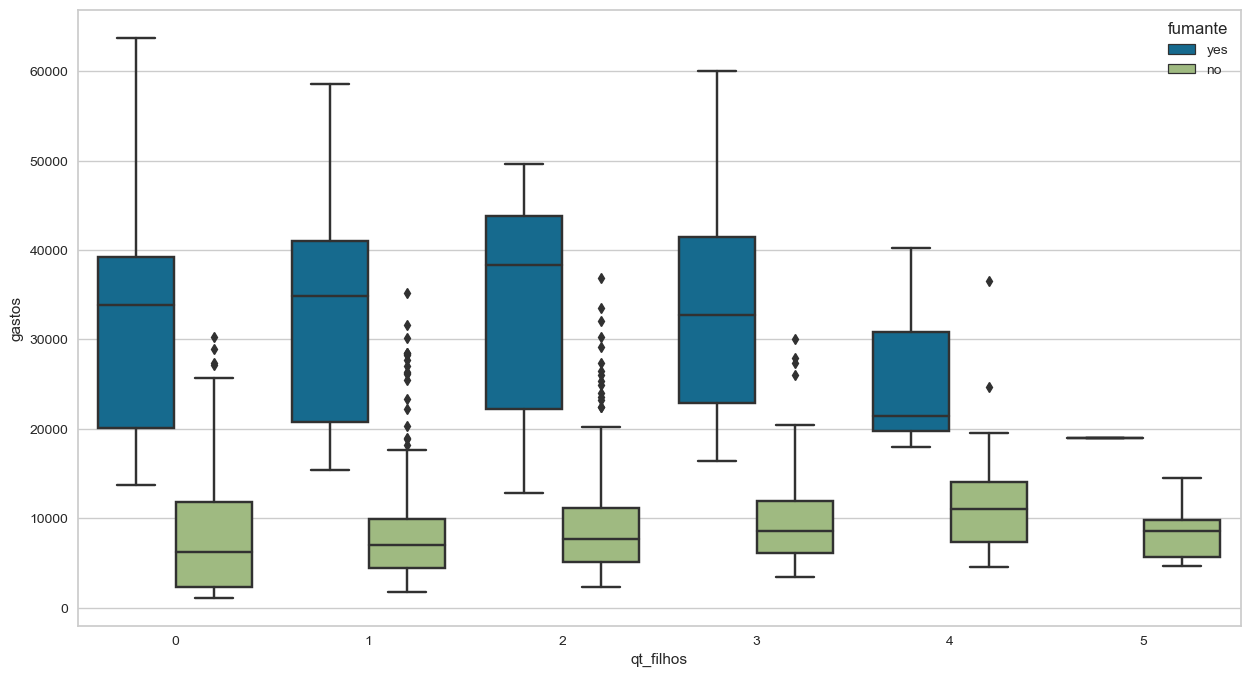

In [139]:
ax = sns.boxplot(x="qt_filhos", y="gastos", data=df, hue="fumante")
ax.figure.set_size_inches(15,8)

Será que homens fumam mais que mulheres?

In [140]:
str(115/(547+115)*100) + '%'

'17.371601208459214%'

In [141]:
str(159/(517+159)*100) + '%'

'23.5207100591716%'

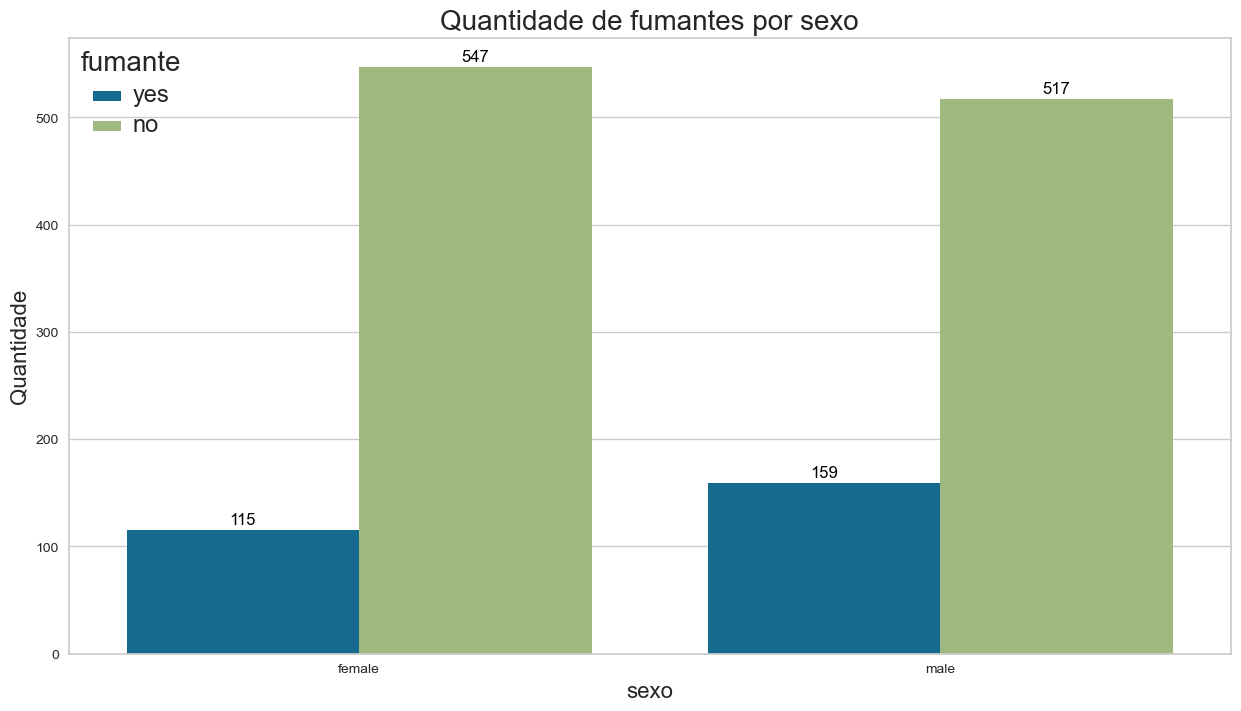

In [142]:
ax = sns.countplot(x="sexo", data=df, hue="fumante")
ax.figure.set_size_inches(15,8)
ax.set_title(f"Quantidade de fumantes por sexo", fontsize=20)
ax.set_xlabel(f"sexo", fontsize=16)
ax.set_ylabel("Quantidade", fontsize=16)
plt.setp(ax.get_legend().get_texts(), fontsize='17') # Para o texto da legenda
plt.setp(ax.get_legend().get_title(), fontsize='20') # Para o título da legenda

for container in ax.containers:
    ax.bar_label(container, fontsize=12, padding=2, color='black')    

De acordo com o conjunto de dados a quantidade de fumantes por sexo está bem equiparada.

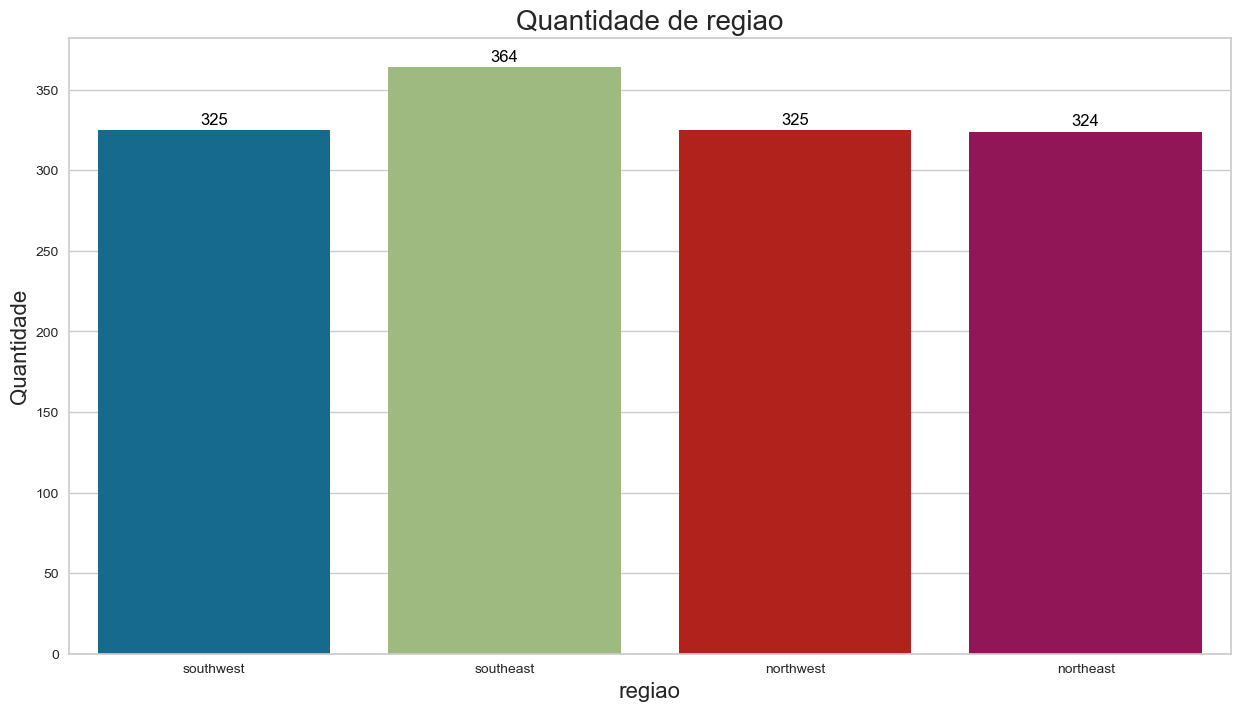

In [143]:
plot_categorical_variable("regiao", df)

Temos alguma região que os gastos de fumantes são maiores que os gastos de não fumantes?

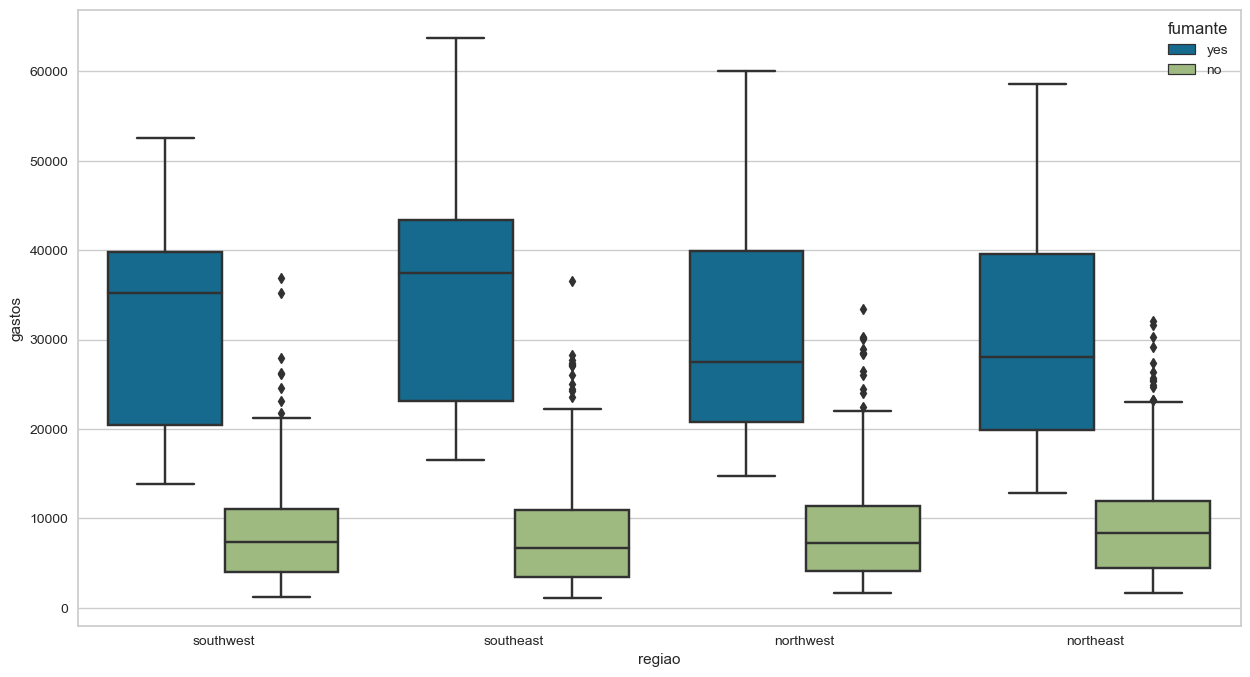

In [144]:
ax = sns.boxplot(x="regiao", y="gastos", data=df, hue="fumante")
ax.figure.set_size_inches(15,8)

## Analisando a correlação

-> Explicar por que é tão importante analisarmos a correlação e em que deixar duas variáveis correlacionadas impactam no modelo.

![](https://miro.medium.com/max/875/1*xiRhE0Q3fpjpQavKK4FBaA.png)

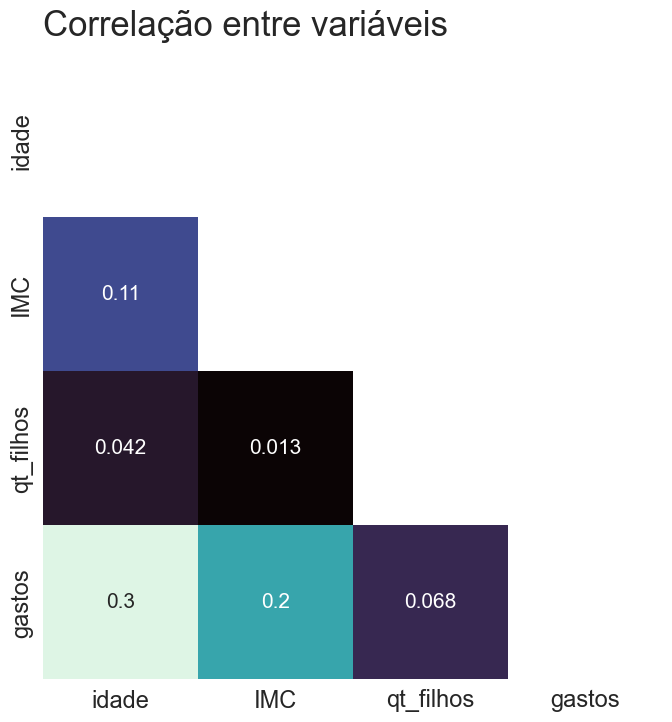

In [145]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corr, mask=mask, fmt=".2",  annot=True, cbar=False, 
                     cmap='mako', annot_kws={"fontsize":15})
    ax.tick_params(labelsize=17)
    ax.set_title('Correlação entre variáveis', fontsize=25, loc='left', pad=20)

# Dummização

Vamos utilizar o método [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) do pandas para transformar as variáveis categóricas em variáveis numéricas.

![](https://e6v4p8w2.rocketcdn.me/wp-content/uploads/2022/01/One-Hot-Encoding-for-Scikit-Learn-in-Python-Explained-1024x576.png)

In [146]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,idade,IMC,qt_filhos,gastos,sexo_male,fumante_yes,regiao_northwest,regiao_southeast,regiao_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


# Construção dos modelos


## Regressão Linear

O que um algoritmo de regressão linear faz?

Ele tenta construir uma reta que melhor explique a relação dos dados.

Para entender um pouco mais sobre regressão linear deixo como indicação o artigo da alura ["Desvendando a Regressão Linear"](https://www.alura.com.br/artigos/desvendando-a-regressao-linear).

Outro artigo é ["O Método dos Mínimos Quadrados Ordinários e Regressão Linear Simples"](https://lamfo-unb.github.io/2020/02/07/O-M%C3%A9todo-dos-M%C3%ADnimos-Quadrados-Ordin%C3%A1rios-e-Regress%C3%A3o-Linear-Simples/).

![](https://sigmoidal.ai/wp-content/uploads/2022/06/1w7xxhJu2HSnw8BGAhDukcw.gif)

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [148]:
SEED = 42

In [149]:
X = df_dummy.drop('gastos', axis=1)
y = df_dummy['gastos']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=SEED)

In [151]:
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)


LinearRegression()

![](https://miro.medium.com/max/580/1*z9Vu07yY08wGGDRyaOrvKw.png)

![](data/reg_01.jpg)

In [153]:
reg_linear.intercept_

-12428.956879620797

De um modo geral podemos dizer que o intercepto representa o valor médio da variável target quando todas as variáveis explicativas são iguais a zero. E quais são as variáveis explicativas? São as variáveis que explicam o comportamento da variável target.

`coef_`: coeficientes de cada variável explicativa.

In [119]:
reg_linear.coef_

array([  261.55173986,   347.16091787,   371.97710907,   121.32502911,
       23700.33316313,  -338.97094936,  -886.43711726,  -802.65342394])

In [154]:
reg_linear.feature_names_in_

array(['idade', 'IMC', 'qt_filhos', 'sexo_male', 'fumante_yes',
       'regiao_northwest', 'regiao_southeast', 'regiao_southwest'],
      dtype=object)

In [155]:
for i in zip(reg_linear.feature_names_in_, reg_linear.coef_):
    print(i)

('idade', 261.5517398617734)
('IMC', 347.1609178695243)
('qt_filhos', 371.9771090670389)
('sexo_male', 121.32502911411909)
('fumante_yes', 23700.333163129188)
('regiao_northwest', -338.9709493572588)
('regiao_southeast', -886.4371172644018)
('regiao_southwest', -802.6534239415943)


`coef_` são conhecidos como coeficientes parciais de regressão ou coeficientes parciais angulares. Considerando o nosso modelo, $\beta_2$ mediria a variação no valor médio de $Y$ (gastos) por unidade de variação em $X_2$ (idade), mantendo-se $X_3$ (qt_filhos) e $X_4$ (sexo_male) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.

### Métricas

* R2: Coeficiente de determinação

> O R-quadrado é uma medida estatística de quão próximos os dados estão da linha de regressão ajustada. Ele também é conhecido como o coeficiente de determinação ou o coeficiente de determinação múltipla para a regressão múltipla.

$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

Onde: 

$$\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$$

$$\sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} \epsilon_i^2$$

* MAE: Mean Absolute Error

$$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|.$$

* MSE: Mean Squared Error

$$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.$$

* RMSE: Root Mean Squared Error

$$\text{RMSE}(y, \hat{y}) = \sqrt{\frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2} = \sqrt{MSE}$$

In [75]:
# MAE
mae = metrics.mean_absolute_error(y_test, reg_linear.predict(X_test))
mae

4193.042401408502

In [77]:
mse = metrics.mean_squared_error(y_test, reg_linear.predict(X_test))
mse

35087527.614172444

In [79]:
rmse = np.sqrt(mse)
rmse

5923.472597570824

In [81]:
r2 = metrics.r2_score(y_test, reg_linear.predict(X_test))
r2

0.7605676785381418

In [100]:
def df_metrics_regression(modelo, X_test, y_test, nome_modelo):
    mae = metrics.mean_absolute_error(y_test, modelo.predict(X_test))
    mse = metrics.mean_squared_error(y_test, modelo.predict(X_test))
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, modelo.predict(X_test))
    return pd.DataFrame({'MAE': [mae], 'MSE': [mse], 'RMSE': [rmse], 'R2': [r2]}, index=[nome_modelo]).round(2)
    

In [102]:
metricas_reg_linear = df_metrics_regression(reg_linear, X_test, y_test, 'reg_linear')
metricas_reg_linear

,MAE,MSE,RMSE,R2
reg_linear,4193.04,35087527.61,5923.47,0.76


## Árvore de Decisão

Link para compreender melhor sobre árvore de decisão ["Decision Tree"](https://mlu-explain.github.io/decision-tree/)

In [82]:
from sklearn.tree import DecisionTreeRegressor

In [159]:
dtr = DecisionTreeRegressor(random_state=SEED, max_depth=2)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [103]:
dtr_metrics = df_metrics_regression(dtr, X_test, y_test, 'dtr')
dtr_metrics

,MAE,MSE,RMSE,R2
dtr,2664.04,21625857.11,4650.36,0.85


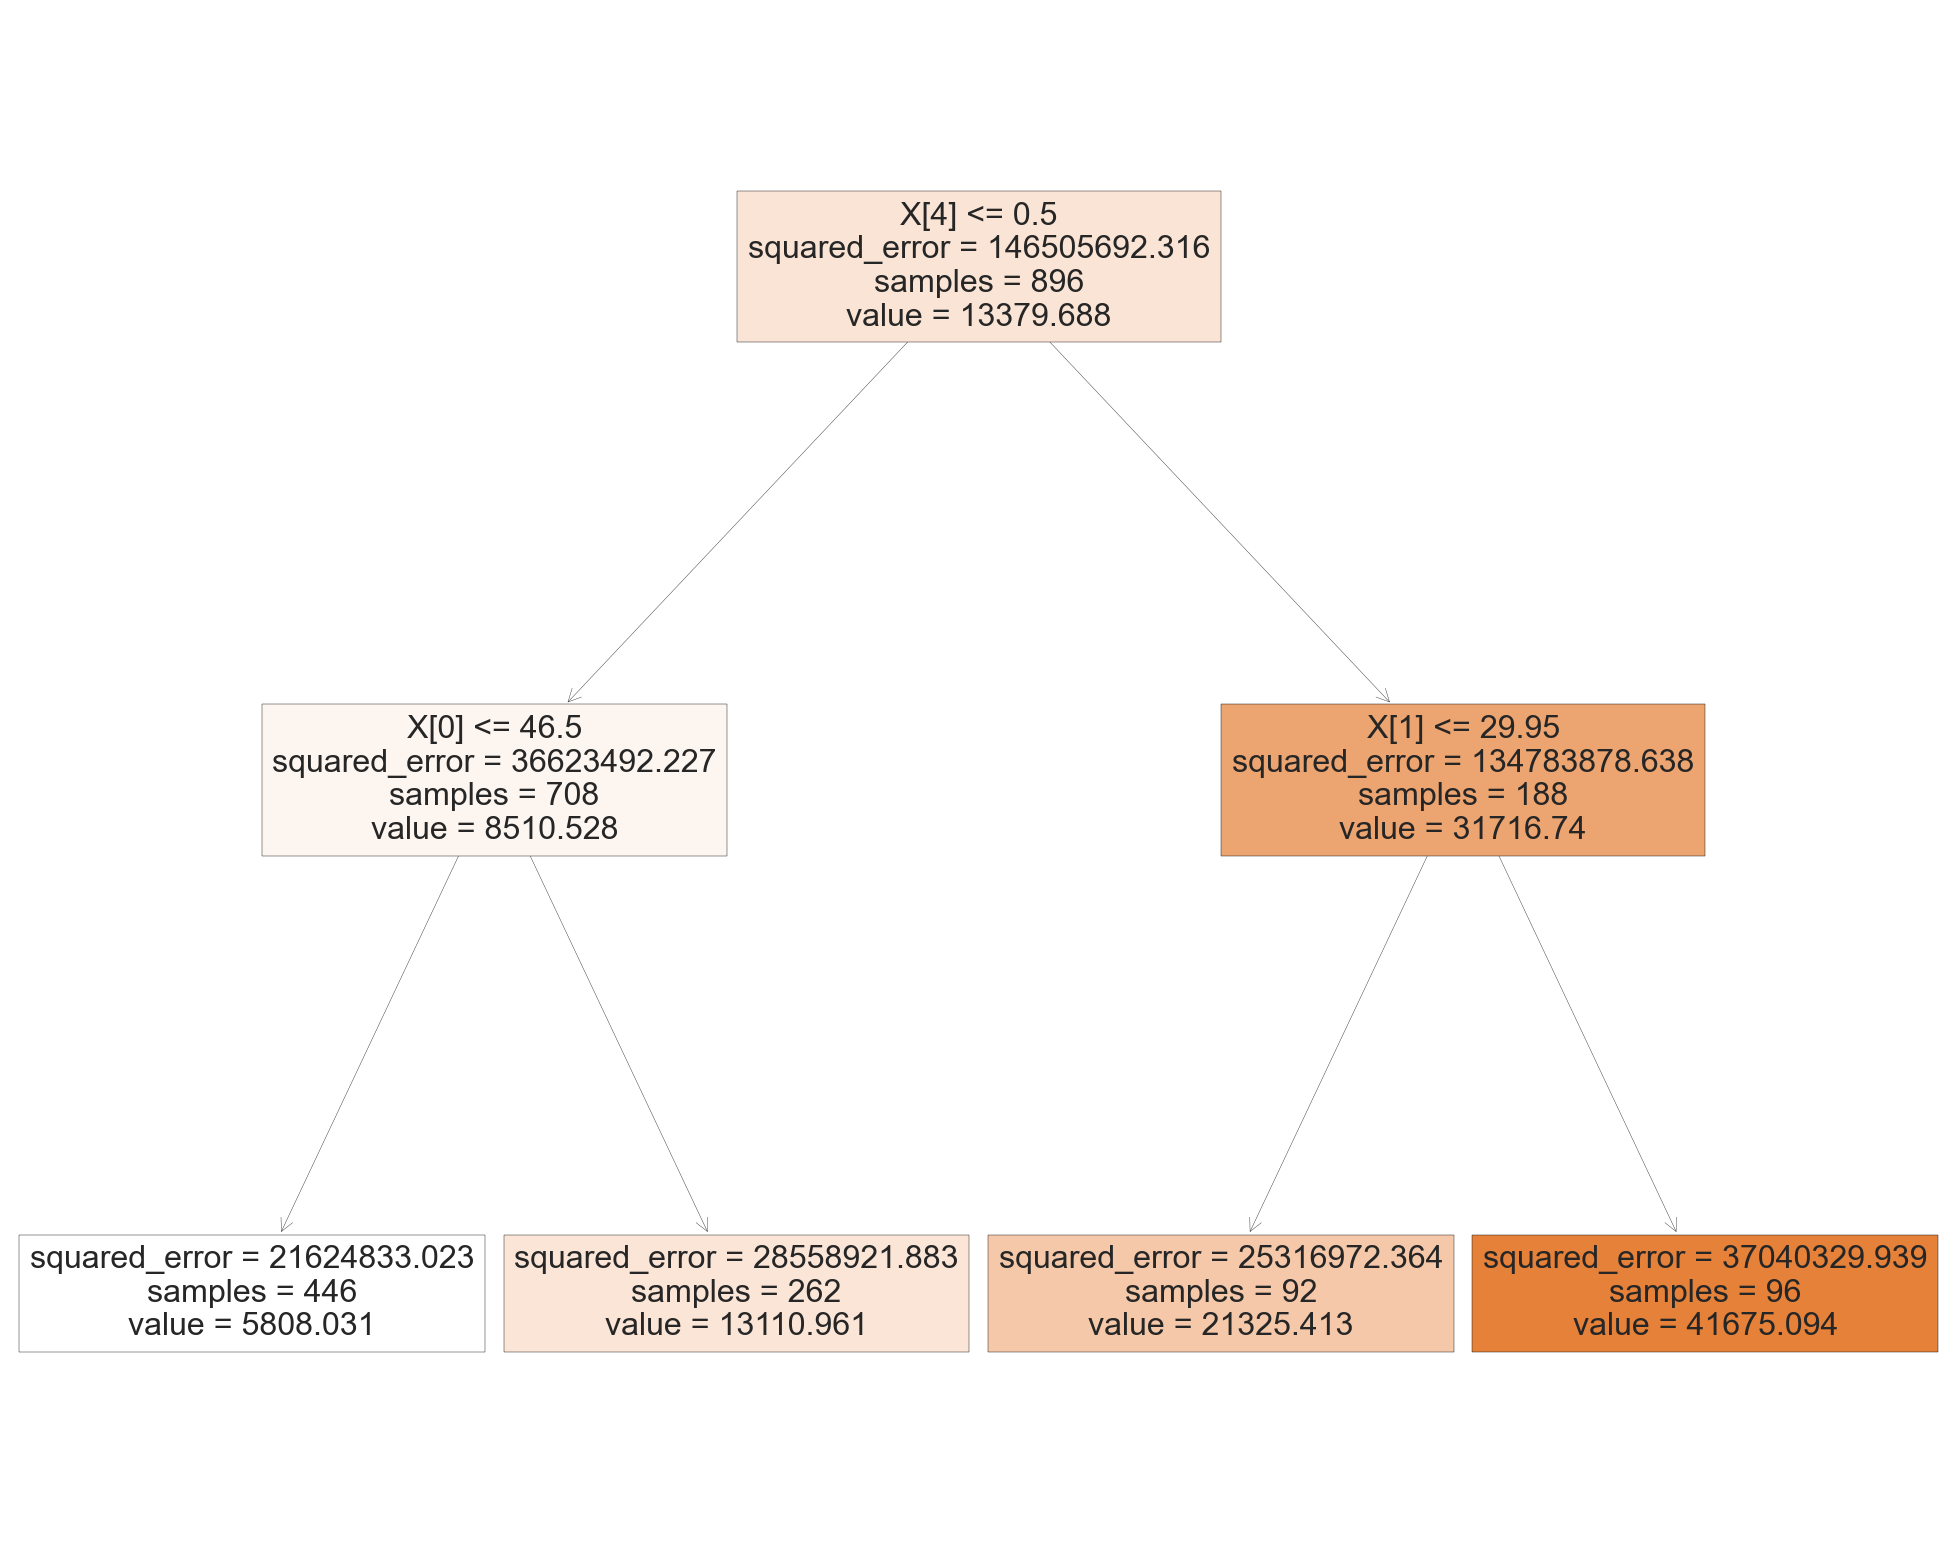

In [160]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr, filled=True)

## Interpretação gráfica

In [104]:
from yellowbrick.regressor import PredictionError

c:\Users\Bruno\anaconda3\envs\data_science\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


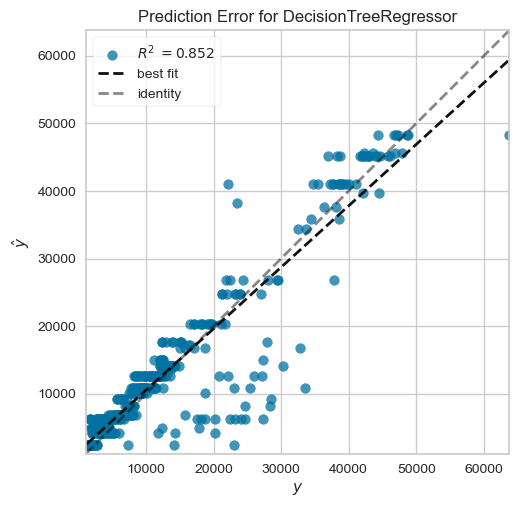

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [105]:
visualizer = PredictionError(dtr)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## Fazendo novas predições

In [109]:
X_test.iloc[20]

idade               25.0
IMC                 23.9
qt_filhos            5.0
sexo_male            1.0
fumante_yes          0.0
regiao_northwest     0.0
regiao_southeast     0.0
regiao_southwest     1.0
Name: 413, dtype: float64

In [115]:
X_test.iloc[20].values.reshape(1, -1).shape

(1, 8)

In [116]:
dtr.predict(X_test.iloc[20].values.reshape(1, -1))

c:\Users\Bruno\anaconda3\envs\data_science\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([4218.07428571])